In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [31]:
tickers = ['AAPL', 'MSFT', 'NFLX', 'AMZN', 'GOOG']
start = datetime(2000, 1, 1)
end = datetime.today()

In [34]:
entreprise = "GOOG"

In [35]:
df = data.DataReader(entreprise, 'yahoo', start, end)

In [36]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086
...,...,...,...,...,...,...
2020-02-18,1531.630005,1512.589966,1515.000000,1519.670044,1120700.0,1519.670044
2020-02-19,1532.105957,1521.400024,1525.069946,1526.689941,949300.0,1526.689941
2020-02-20,1529.640015,1506.819946,1522.000000,1518.150024,1096600.0,1518.150024


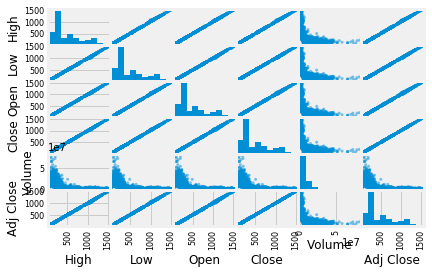

In [38]:
pd.plotting.scatter_matrix(df);

In [39]:
df.corr() # correlation lineaire forte entre les 4 prix

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999859,0.999909,0.999890,-0.546949,0.999890
Low,0.999859,1.000000,0.999876,0.999912,-0.550196,0.999912
Open,0.999909,0.999876,1.000000,0.999780,-0.548351,0.999780
Close,0.999890,0.999912,0.999780,1.000000,-0.548634,1.000000
Volume,-0.546949,-0.550196,-0.548351,-0.548634,1.000000,-0.548634
Adj Close,0.999890,0.999912,0.999780,1.000000,-0.548634,1.000000


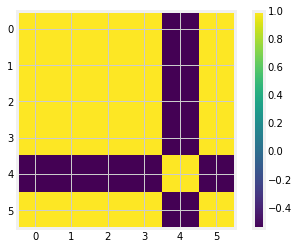

In [40]:
plt.imshow(df.corr());
plt.colorbar(); # forte correlation entre les 4 prix

In [44]:
df.drop(columns = ["Volume"] , inplace = True)

In [45]:
df

,High,Low,Open,Close,Adj Close
Date,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,52.802086
...,...,...,...,...,...
2020-02-18,1531.630005,1512.589966,1515.000000,1519.670044,1519.670044
2020-02-19,1532.105957,1521.400024,1525.069946,1526.689941,1526.689941
2020-02-20,1529.640015,1506.819946,1522.000000,1518.150024,1518.150024


In [58]:
%matplotlib inline

In [49]:
df.plot();

In [53]:
df #puisque tous les pricx sont fortement correlées donc on travaille avec ladjusted close uniquement

,High,Low,Open,Close,Adj Close
Date,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,52.802086
...,...,...,...,...,...
2020-02-18,1531.630005,1512.589966,1515.000000,1519.670044,1519.670044
2020-02-19,1532.105957,1521.400024,1525.069946,1526.689941,1526.689941
2020-02-20,1529.640015,1506.819946,1522.000000,1518.150024,1518.150024


In [54]:
df.drop(columns = ["High", "Low", "Open", "Close"], inplace = True)

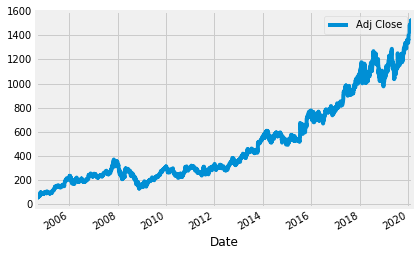

In [59]:
df.plot();

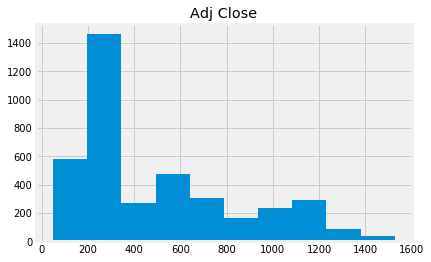

In [60]:
df.hist();

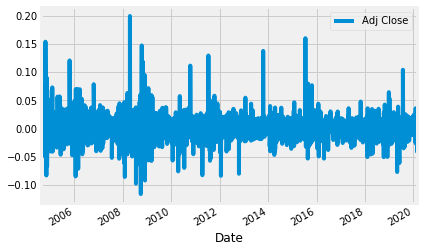

In [63]:
df.pct_change().plot();

In [4]:
100 * abs(df.mean() - df.median())/df.mean()

AAPL    55.442393
MSFT    39.383773
NFLX    79.889329
AMZN    67.046936
GOOG    35.363485
dtype: float64

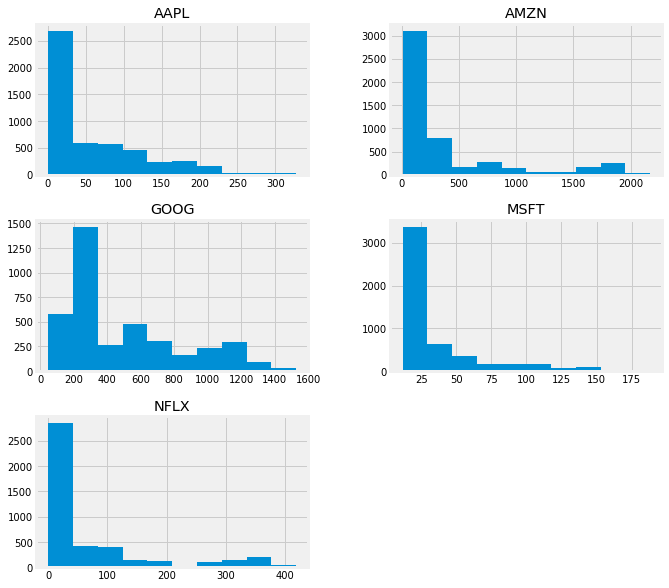

In [5]:
df.hist(figsize=(10,10));

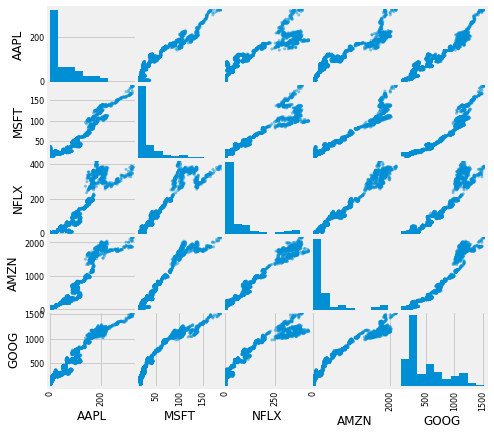

In [6]:
pd.plotting.scatter_matrix(df,figsize=(7,7));

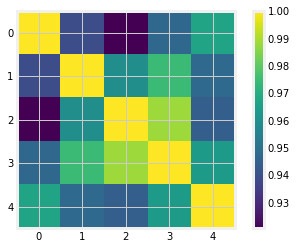

In [7]:
plt.imshow(df.corr());
plt.colorbar();

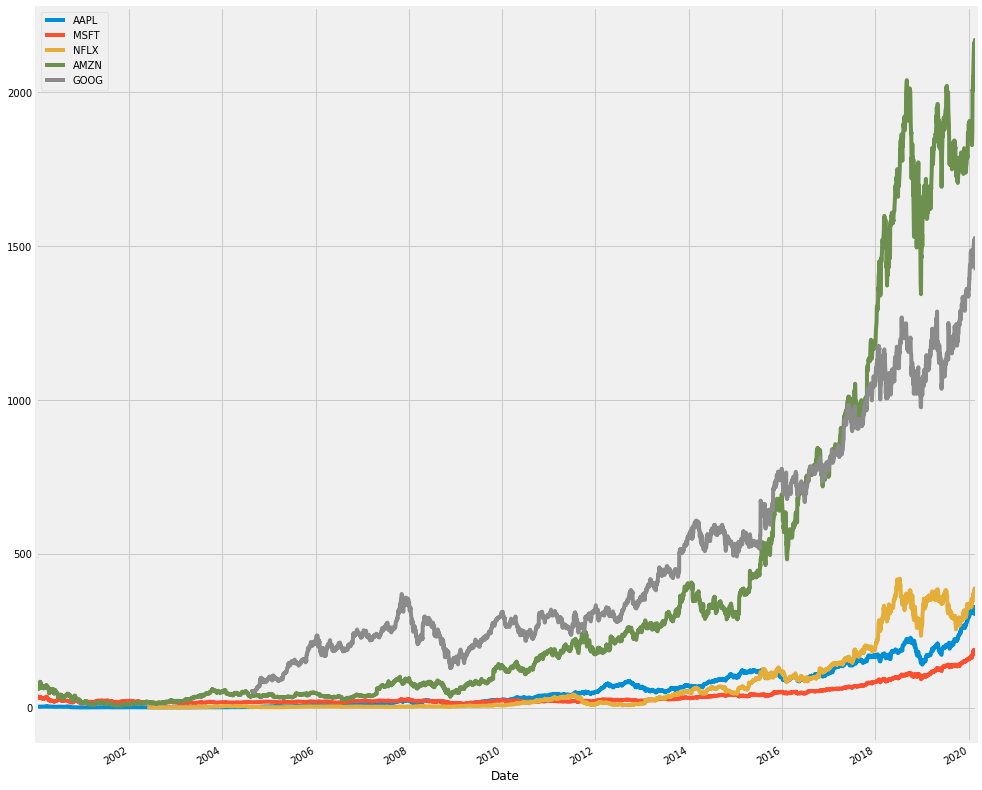

In [8]:
df.plot(figsize=(15,15));

In [9]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio
def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
#iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results_matrix[j+3,i] = weights[j]
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
    return results_df

In [10]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.0
results_frame = simulate_random_portfolios(num_portfolios, mean_returns, cov,rf)

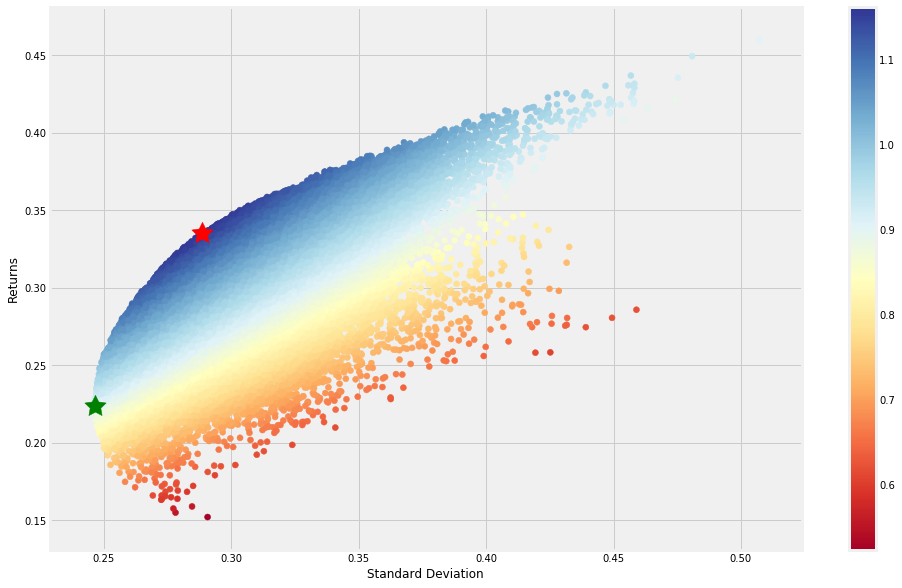

In [11]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=500)
plt.show()

In [12]:
max_sharpe_port.to_frame().T

,ret,stdev,sharpe,AAPL,MSFT,NFLX,AMZN,GOOG
24943,0.335415,0.28855,1.162416,0.0,0.0,0.0,0.0,0.0


In [13]:
min_vol_port.to_frame().T

,ret,stdev,sharpe,AAPL,MSFT,NFLX,AMZN,GOOG
82326,0.223857,0.246405,0.908492,0.0,0.0,0.0,0.0,0.0


In [16]:
def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [17]:
def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1./num_assets,],args=args,method='SLSQP', bounds=bounds, constraints=constraints)
    return result
optimal_port_sharpe = max_sharpe_ratio(mean_returns, cov, rf)

In [18]:
pd.DataFrame([round(x,2) for x in optimal_port_sharpe['x']],index=tickers).T

,AAPL,MSFT,NFLX,AMZN,GOOG
0,0.25,0.0,0.27,0.03,0.45


In [19]:
def calc_portfolio_std(weights, mean_returns, cov):
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(252)
    return portfolio_std
def min_variance(mean_returns, cov):
    num_assets = len(mean_returns)
    args = (mean_returns, cov)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_std, num_assets*[1./num_assets,],args=args,method='SLSQP', bounds=bounds, constraints=constraints)
    return result
min_port_variance = min_variance(mean_returns, cov)

In [20]:
pd.DataFrame([round(x,2) for x in min_port_variance['x']],index=tickers).T

,AAPL,MSFT,NFLX,AMZN,GOOG
0,0.1,0.4,0.07,0.0,0.42


In [21]:
def calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(mean_returns * weights) * days
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov, weights))) * np.sqrt(days)
    portfolio_var = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha)))
    return portfolio_return, portfolio_std, portfolio_var

def simulate_random_portfolios_VaR(num_portfolios, mean_returns, cov, alpha,days):
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, portfolio_VaR = calc_portfolio_perf_VaR(weights, mean_returns, cov, alpha, days)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = portfolio_VaR
#iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results_matrix[j+3,i] = weights[j]
        results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','VaR'] + [ticker for ticker in tickers])
    return results_df

In [22]:
mean_returns = df.pct_change().mean()
cov = df.pct_change().cov()
num_portfolios = 100000
rf = 0.0
days = 252
alpha = 0.05
results_frame = simulate_random_portfolios_VaR(num_portfolios, mean_returns,cov, alpha, days)

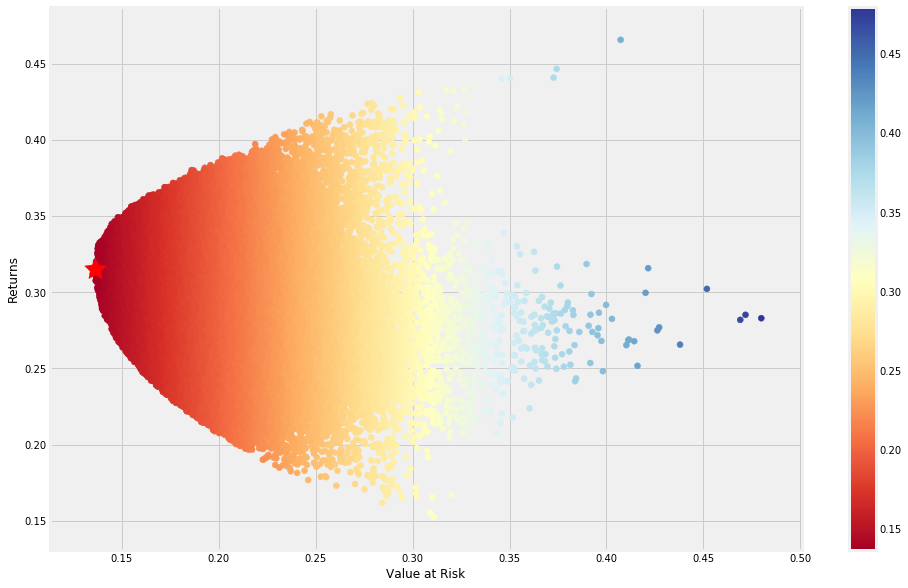

In [23]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.VaR,results_frame.ret,c=results_frame.VaR,cmap='RdYlBu')
plt.xlabel('Value at Risk')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[2],min_VaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()

In [24]:
min_VaR_port.to_frame().T

,ret,stdev,VaR,AAPL,MSFT,NFLX,AMZN,GOOG
83528,0.31533,0.274395,0.13601,0.0,0.0,0.0,0.0,0.0


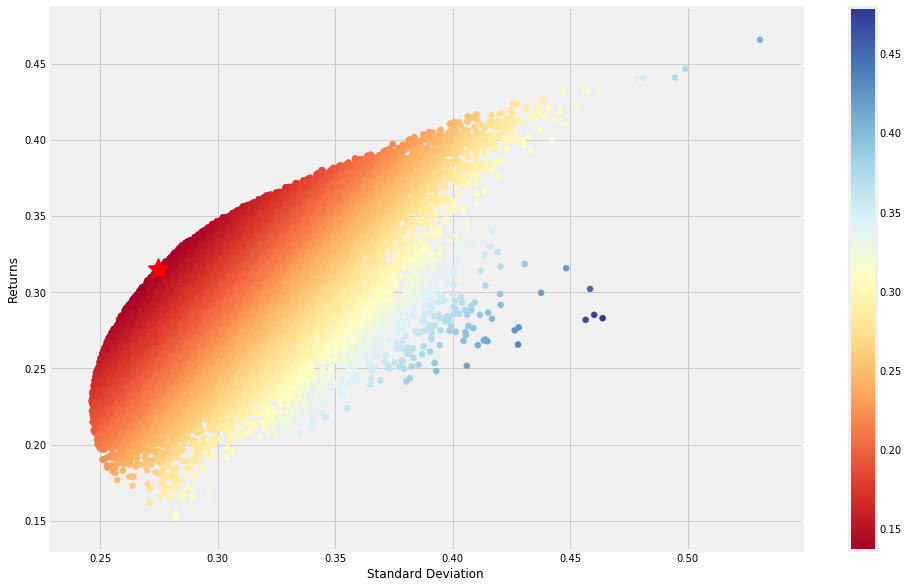

In [25]:
#locate positon of portfolio with minimum VaR
min_VaR_port = results_frame.iloc[results_frame['VaR'].idxmin()]
#create scatter plot coloured by VaR
plt.subplots(figsize=(15,10))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.VaR,cmap='RdYlBu')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of minimum VaR portfolio
plt.scatter(min_VaR_port[1],min_VaR_port[0],marker=(5,1,0),color='r',s=500)
plt.show()